In [2]:
from lambeq import BobcatParser, Rewriter, AtomicType, IQPAnsatz
from pytket.circuit.display import render_circuit_jupyter
from discopy import grammar

In [8]:
sentence = 'I cook'

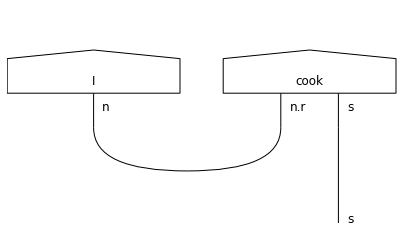

In [9]:
parser = BobcatParser()  # (GALLI TÜECHLI) will download Model so may take a while [1.5 GB]

diagram = parser.sentence2diagram(sentence)

grammar.draw(diagram, figsize=(14, 3), fontsize=12)

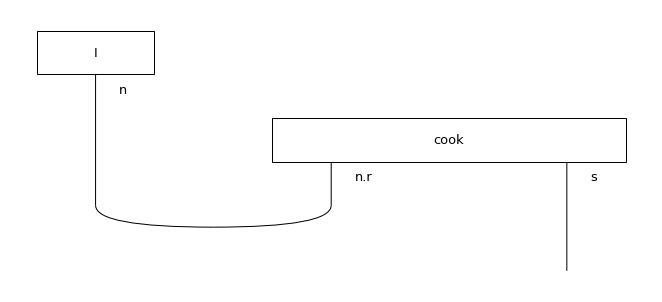

In [10]:
rewriter = Rewriter(['prepositional_phrase', 'determiner'])
rewritten_diagram = rewriter(diagram)

normalised_diagram = rewritten_diagram.normal_form()
normalised_diagram.draw(figsize=(9, 4), fontsize=13)

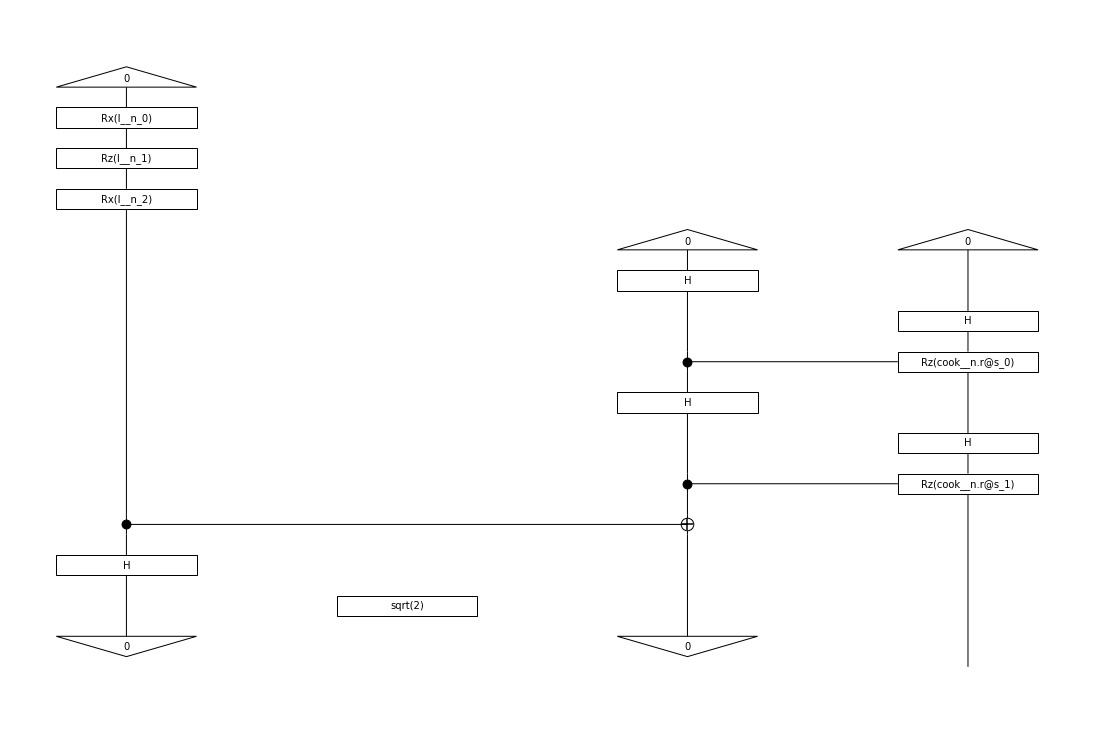

In [11]:
N = AtomicType.NOUN
S = AtomicType.SENTENCE

ansatz = IQPAnsatz({N: 1, S: 1}, n_layers=2)
discopy_circuit = ansatz(normalised_diagram)
discopy_circuit.draw(figsize=(15, 10))

tket_circuit = discopy_circuit.to_tk()

In [12]:
render_circuit_jupyter(tket_circuit)

In [14]:
tket_circuit.measure_all()

tk.Circuit(3, 3).Rx(2*I__n_0, 0).H(1).H(2).Rz(2*I__n_1, 0).CRz(2*cook__n.r@s_0, 1, 2).Rx(2*I__n_2, 0).H(1).H(2).CRz(2*cook__n.r@s_1, 1, 2).Measure(2, 2).CX(0, 1).Measure(1, 1).Measure(2, 2).H(0).Measure(0, 0).Measure(1, 1).Measure(0, 0).Measure(1, 1).Measure(0, 0).post_select({0: 0, 1: 0}).scale(2)

In [84]:
from lambeq import NumpyModel
import numpy as np

In [85]:
BATCH_SIZE = 30
EPOCHS = 1000
SEED = 2

In [86]:
from pandas import read_csv

In [87]:
data = read_csv('./dataset.csv')

In [88]:
data2d = data.to_numpy()

sentences1 = []
sentences2 = []
results = []

for row in data2d:
    sentences1.append(row[0])
    sentences2.append(row[1])
    results.append(row[2])

In [89]:
print(results)

[1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1]


In [ ]:
parser = BobcatParser(root_cats=('NP', 'N'), verbose='text')

raw_train_diagrams1 = parser.sentences2diagrams(sentences1, suppress_exceptions=True)
raw_train_diagrams2 = parser.sentences2diagrams(sentences2, suppress_exceptions=True)

Tagging sentences.


In [ ]:
raw_train_diagrams1[0].draw(figsize=(9, 5), fontsize=12)
raw_train_diagrams2[0].draw(figsize=(9, 5), fontsize=12)